## Final Project Submission

Please fill out:
* Student name: Hazel Donaldson
* Student pace:  part time
* Scheduled project review date/time: June 17th, 2019
* Instructor name: Victor Geislinger
* Blog post URL: https://callroko.github.io/module_01_project_data_cleaning


## King County Housing Data
This dataset contains information about housing in King County from between May 2014 and May 2015. The goal of the this project was to create a house price predictive model using multiple linear regression with avaiable features in the dataset using good data science. My approach was to obtain and look at the Pandas dataframe, then remove information that was not useful, deal with missing data and outliers. After the dataset was clean, I was able to examine which features would fit the model best. This was accomplished through looking at histograms and scatter plots. Then I checked for collinearity in the feature columns using a heatmap. Then I log transformed data where it was necessary and separated categorical variables from continous variables. I ran an OLS regression model using Statsmodels and looked at the performance and checked its quality. I ran a few variations to see what would improve the model. Then I ran a model with the categorical variable and checked the k-fold cross validation and performed a test-train-split

# Obtain

The first step is to import the revelant libraries that I will use for this project then load the dataset to get a quick overview of what is inside.

In [12]:
#importing the relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#loading and obtaining the dataset
housing = pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
housing.shape

(21597, 21)

Using the .shape function, I can see that the dataset has 21597 rows and 21 columns.

# Data Cleaning

The next step is to clean the data. This can mean dropping columns we do not need, dealing with null values, dealing with outliers and fixing datatypes. Looking at the head of the dataset above, I can see that the first thing to do is remove the id and date columns.

In [15]:
#to_drop = list(housing)[0:2]
#housing = housing.drop(to_drop, axis = 1)
cols_to_drop = ['id', 'date']
housing = housing.drop(cols_to_drop, axis = 'columns')
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
housing.info() #checking the data types and number of enteries in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [17]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the datatypes and statistics of the data set, I can see some interesting things. For example, I can see that the waterfront, yr_renovated and view columns are missing some entries. The maximum value of the bedrooms seems a bit high. For some reason the sqrt_basement column is a object datatype when the other sqft columns are integers. It's possible some of the data are strings instead of integers. I will investigate this column more closely next.

In [18]:
housing.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [19]:
housing.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2730.0        1
2300.0        1
274.0         1
2360.0        1
768.0         1
2570.0        1
862.0         1
243.0         1
207.0         1
508.0         1
2196.0        1
2250.0        1
2310.0        1
1281.0        1
283.0         1
792.0         1
1275.0        1
2600.0        1
516.0         1
588.0         1
506.0         1
2720.0        1
20.0          1
1525.0        1
1008.0        1
1920.0        1
602.0         1
1816.0        1
935.0         1
2240.0        1
Name: sqft_basement, Len

Initially, I thought that the '?' value was a mistake but it looks as if there are 454 values that equal the question mark. So it seems to be a placeholder when the actual value was unknown. I think it would be best to remove the placeholder.

In [20]:
drop = list(housing)[11]
housing = housing.drop(drop, axis = 'columns')
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


This confirms that that waterfront, view and yr_renovated columns do have null values and will need to cleaned further. I will start with looking into the waterfront column.

In [21]:
housing.waterfront.unique() #checking the unique values in the waterfront column

array([nan,  0.,  1.])

In [22]:
housing.waterfront.value_counts() #looking at the how many value counts there are

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The .value_counts() and the .unique() functions show me that there are only ones and zeros, which refer to whether a house has waterfront views (1) or a house doesn't have a waterfront view (0).My plan is to separate the dataframe into whether there is or isn't a waterfront view. This way, the null values are taken out of the column.

In [23]:
waterfront_housing = housing.loc[housing.waterfront == 1]
no_waterfront_housing = housing.loc[housing.waterfront == 0]

In [24]:
#joining the houses with waterfront views with the houses that do not have waterfront views
housing = pd.concat([waterfront_housing, no_waterfront_housing])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,1953,0.0,98070,47.4041,-122.451,2680,72513
230,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,2000,0.0,98074,47.6338,-122.072,3120,18841
264,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,2002,0.0,98074,47.6053,-122.077,4550,19508


In [25]:
housing.isna().sum() #checking the number of null values in the waterfront column

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Now that the waterfront column has been dealt with. It's time to work on the yr_renovated column.

In [26]:
housing.yr_renovated.unique()

array([   0., 1978.,   nan, 1990., 2002., 1963., 2001., 2006., 1993.,
       1991., 1980., 2009., 1989., 1984., 1998., 1983., 1986., 1997.,
       1958., 1988., 1965., 1987., 2010., 1992., 2013., 1994., 2005.,
       2003., 1954., 2014., 2011., 1977., 1981., 1995., 2000., 1999.,
       1970., 2004., 2007., 1985., 1971., 1945., 1979., 1950., 1969.,
       1948., 2015., 2008., 2012., 1968., 1951., 1962., 1953., 1955.,
       1996., 1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973.,
       1957., 1959., 1960., 1967., 1934., 1972., 1944., 1974.])

In [27]:
housing.yr_renovated.describe()

count    15809.000000
mean        82.321336
std        396.938189
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

For the yr_renovated column, I delete it because there are too many missing values. I think it is best to drop the column.

In [28]:
to_drop =['yr_renovated']
housing = housing.drop(to_drop, axis = "columns")
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
49,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,1953,98070,47.4041,-122.451,2680,72513
230,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,1915,98166,47.4497,-122.375,2030,13193
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,2000,98074,47.6338,-122.072,3120,18841
264,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,1936,98070,47.4683,-122.438,1230,14267
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,2002,98074,47.6053,-122.077,4550,19508


Now I can move onto the view column.

In [29]:
housing.view.unique() #checking the unique values in the view column

array([ 2.,  4.,  3., nan,  1.,  0.])

Similar to the waterfront column, I will split the dataframe between houses between houses that have been viewed and haven't been viewed.

In [30]:
no_view = housing.loc[housing.view == 0 ]
view = housing.loc[housing.view > 0]

housing = pd.concat([no_view, view])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,47.6561,-122.005,4760,101930


Now, I will investigate the bedroom columns to see if the max value is possible.

In [31]:
housing.loc[housing.bedrooms == 33] 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,1947,98103,47.6878,-122.331,1330,4700


It doesn't seem possible to have 33 bedrooms on one floor with one bathroom so, I think the best plan is to delete the row entirely.

In [32]:
housing = housing[housing.bedrooms != 33]
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.916300e+04,19163.000000,19163.000000,19163.000000,1.916300e+04,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000
mean,5.414438e+05,3.372906,2.117048,2082.062412,1.506221e+04,1.495199,0.007567,0.231070,3.409905,7.660752,1791.464645,1971.040808,98077.725147,47.560011,-122.214005,1987.256171,12798.076449
std,3.709099e+05,0.903703,0.769256,921.936240,4.077316e+04,0.540310,0.086659,0.763386,0.650371,1.175622,831.780063,29.388273,53.449799,0.138661,0.140729,684.788436,27553.290912
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000
75%,6.439750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2218.500000,1997.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
housing.isna().sum() #sanity check

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring Data

Now that the dataset has been clean, I can begin to explore the data more closely. The goal of exploring the dataset is to gain a better understanding of which of the features will help make the best model with the target variable. This step is done with the help of visualizations in order to interpret what the distributions look like and whether the features have a linear relationship with the target. Then I will check if the features have any correlation with each other. Finally, there should be a set of features to model against the target variable, price. I will start by looking at the distributions using the .hist() function.

## Histograms

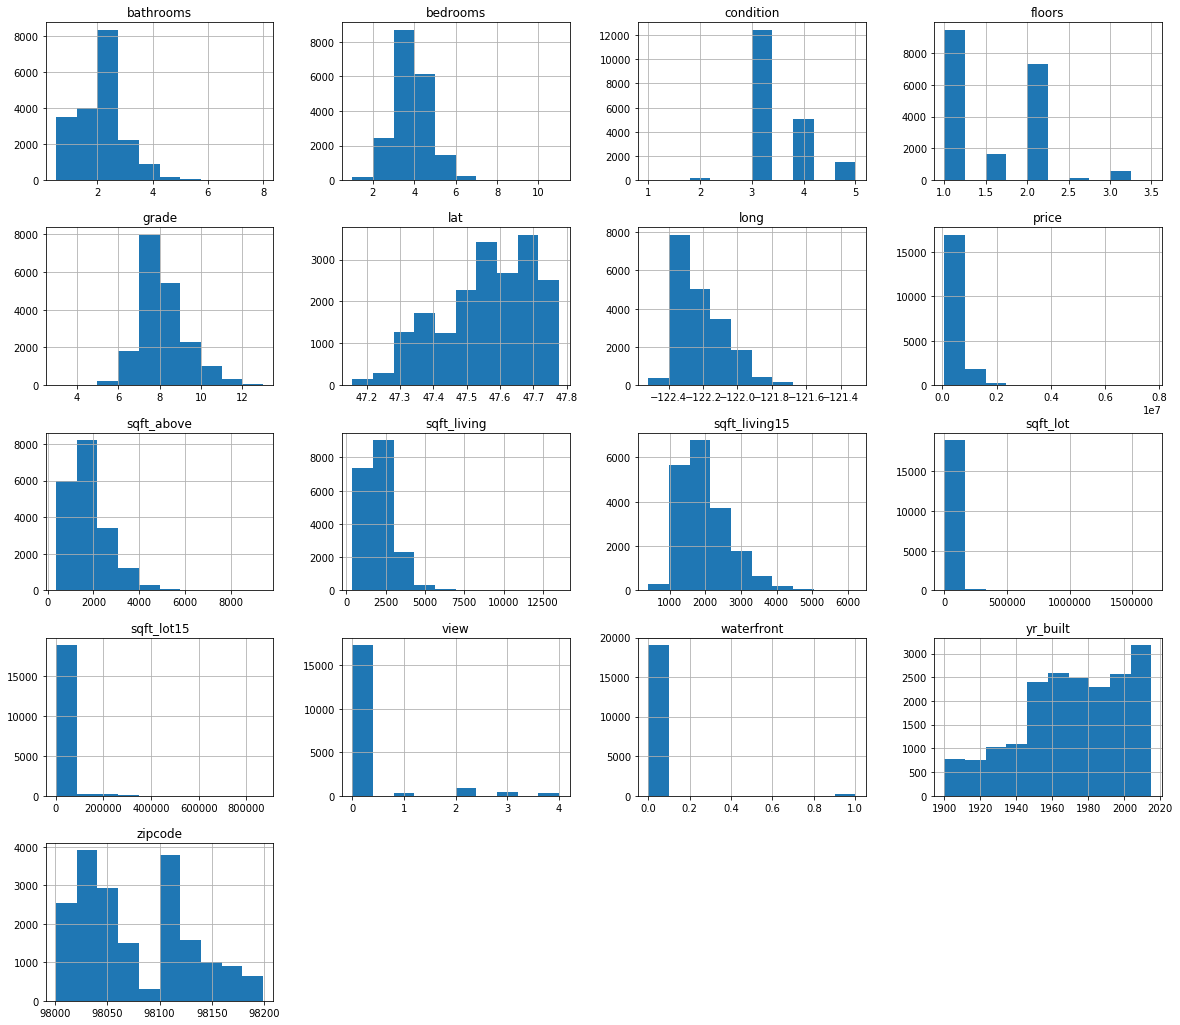

In [34]:
housing.hist(figsize = (20, 18));

Looking at these histograms, most of the data is a bit skewed. The sqft columns have long tails which may mean that those columns will need to be feature scaling. The waterfront column is definitely categorical. The view, condition, floors and grade columns look categorical but for example 2 floors are more than one floor so these columns won't be changed to categorical. The grade and bedrooms columns look like their distribution is somewhat normal. 

## Dist Plots

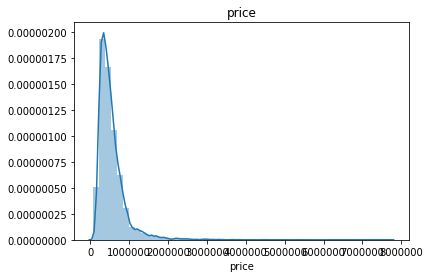

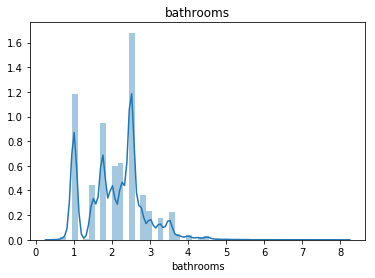

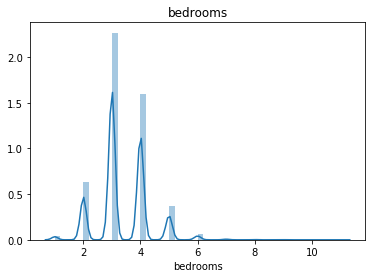

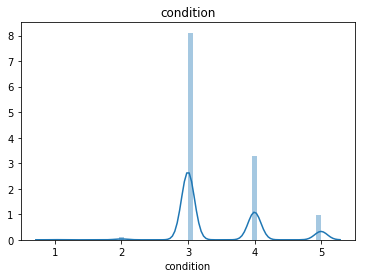

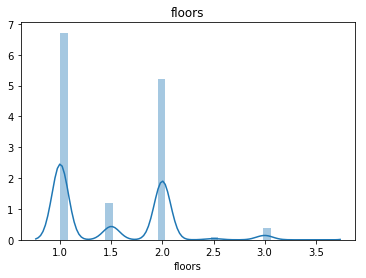

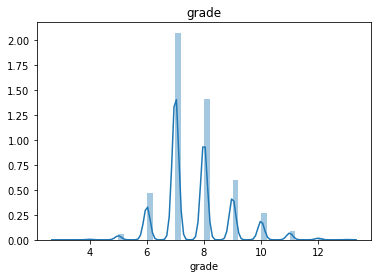

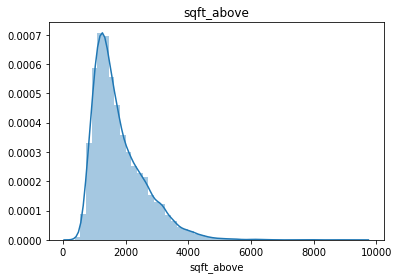

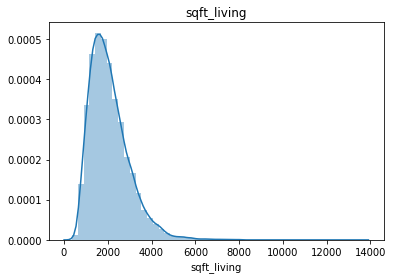

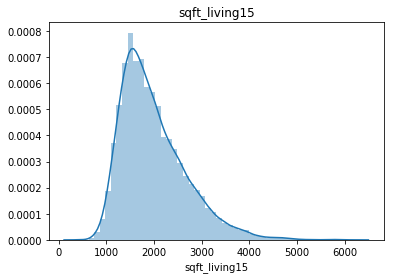

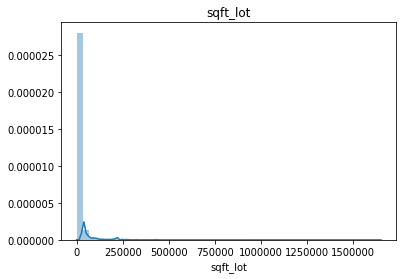

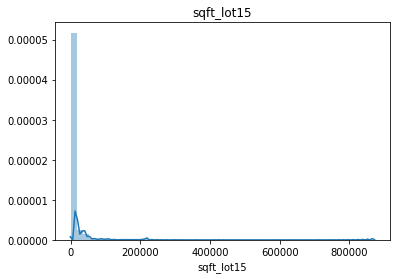

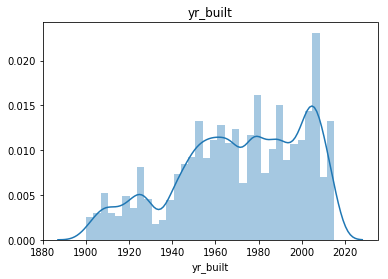

In [35]:
column_list = ['price', 'bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15','yr_built']
for col in column_list:
    sns.distplot(housing[col])
    plt.title(col)
    plt.show();

In [36]:
#Making a clean dataframe without zipcode, longtitude and latitude. Will work with these columns later
housing_pred = housing.drop(['zipcode', 'lat', 'long'], axis = 1)
housing_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,4760,101930


I decided to leave out the zipcode, long and lat because these columns are probably categorical and will need to be dealt with differently.

## Multicollinearity

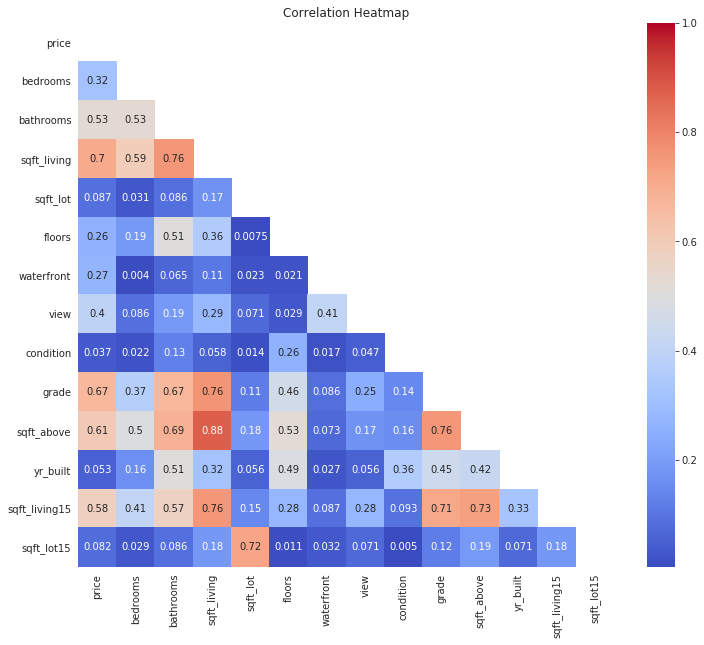

In [37]:
plt.figure(figsize=(12,10))
corr = abs(housing_pred.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

### What features are most highly correlated with price?

Remembering that the target variable is price, the variables most highly correlated to the price are: sqft_living grade, sqft_above. The variables least correlated with price is: sqft_lot15, yr_built, condition. Sqft_living and sqft_above are highly correlated with each other and because sqft_living is more correlated with the price, sqft_above will be dropped.

In [38]:
housing_pred['waterfront'] = housing_pred['waterfront'].astype('category') #changing the waterfront to categorical

In [39]:
col_to_drop = ['sqft_above']
housing_pred = housing_pred.drop(col_to_drop, axis = 1)
housing_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,2001,4760,101930


##  Scaling & Normalizing

In [40]:
housing_pred.skew()

price             4.081052
bedrooms          0.552249
bathrooms         0.524835
sqft_living       1.503625
sqft_lot         13.263266
floors            0.611662
waterfront       11.366023
view              3.438247
condition         1.037048
grade             0.793945
yr_built         -0.473361
sqft_living15     1.117606
sqft_lot15        9.762279
dtype: float64

In [41]:
#Log transforming features that are highly skewed except waterfront because its categorical
housing_pred['sqft_lot'] = np.log(housing['sqft_lot'])
housing_pred['sqft_living'] = np.log(housing['sqft_living'])
housing_pred['sqft_lot15'] = np.log(housing['sqft_lot15'])
housing_pred['price'] = np.log(housing['price'])
housing_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,sqft_living15,sqft_lot15
1,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,7,1951,1690,8.941022
2,12.100712,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,6,1933,2720,8.994917
3,13.311329,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,7,1965,1360,8.517193
4,13.142166,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,8,1987,1800,8.923058
5,14.022525,4,4.50,8.597851,11.532042,1.0,0.0,0.0,3,11,2001,4760,11.532042


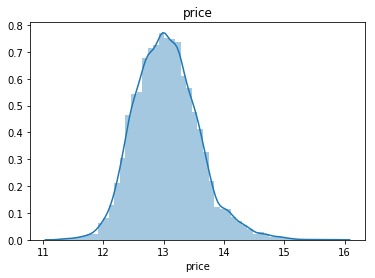

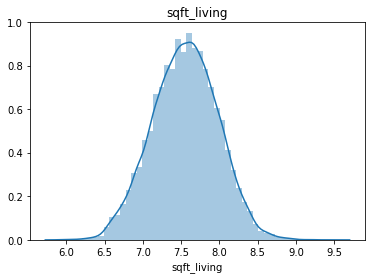

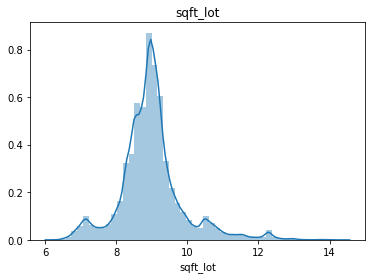

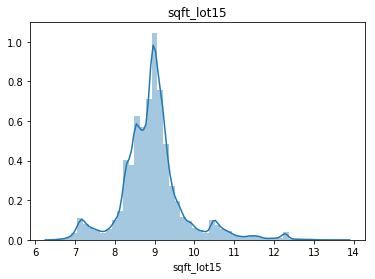

In [42]:
# plots of transformed variables to see if improved by log-transformation.
column_list = ['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']
for col in column_list:
    sns.distplot(housing_pred[col])
    plt.title(col)
    plt.show();

Log transformation has made the data more normally distributed. While there is still some peakedness, this should be good enough to check the linear relationship with the price.

## Joint Plots

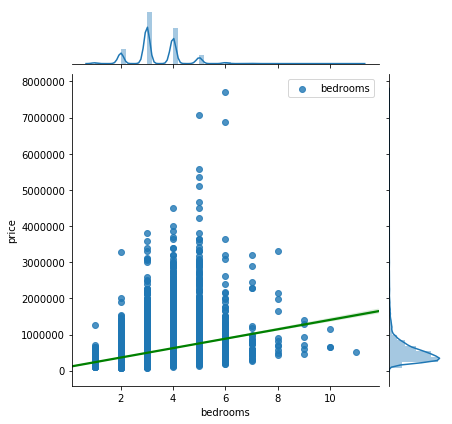

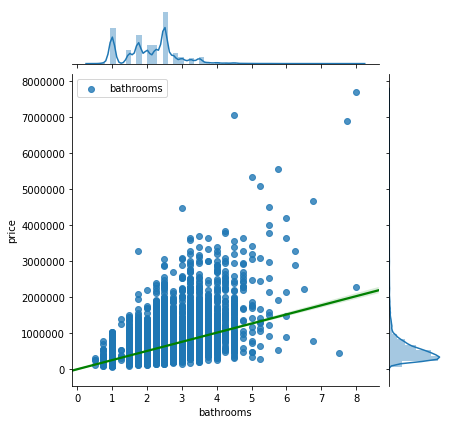

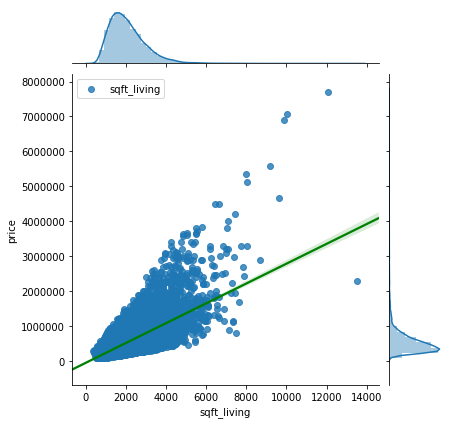

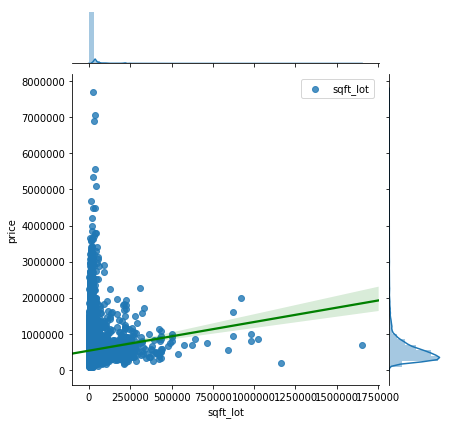

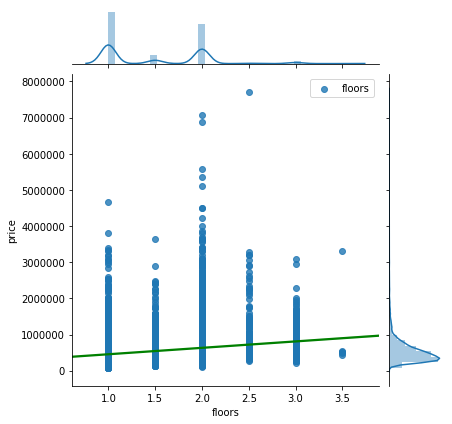

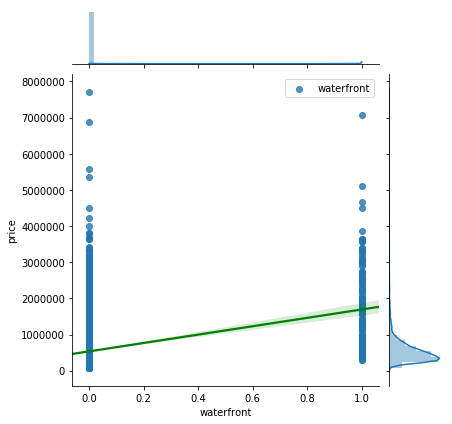

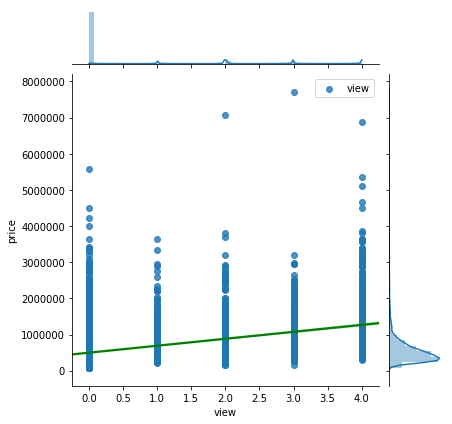

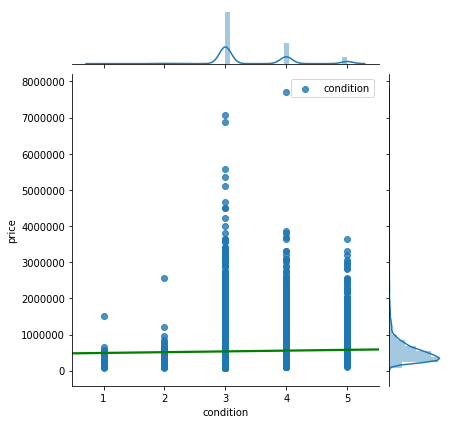

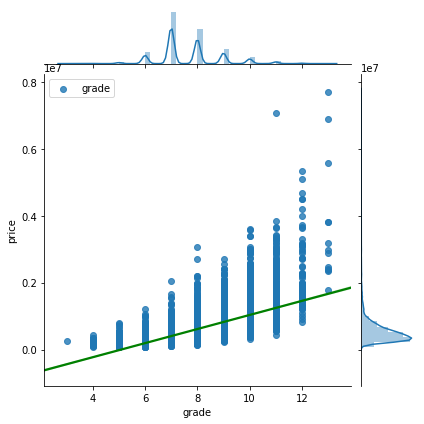

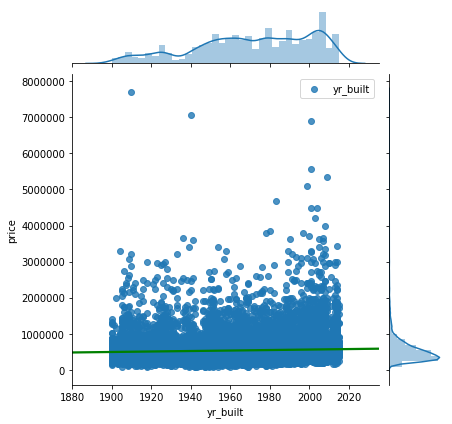

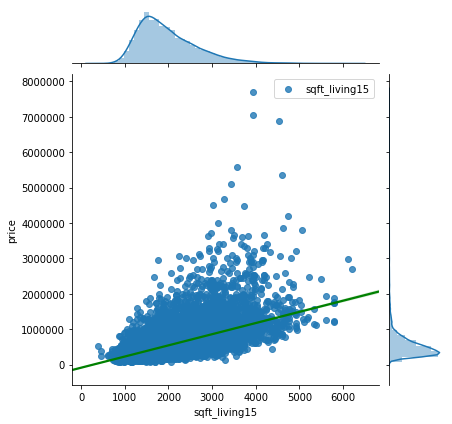

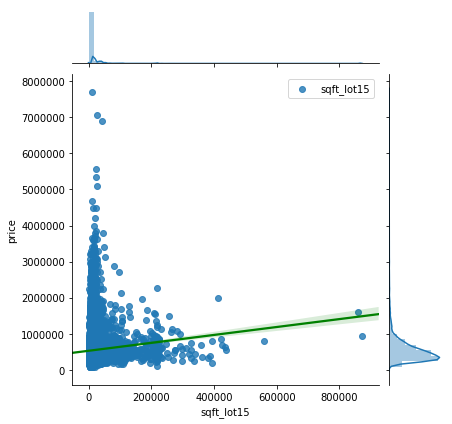

In [43]:
for column in housing_pred.drop(['price'], axis = 'columns'):
    sns.jointplot(x = column, y= 'price',
                data = housing, kind = 'reg',
                label = column, joint_kws = {'line_kws': {'color': 'green'}})
    plt.legend()
    plt.show()

Looking at these scatter plots, nothing has a negative relationship with price. Sqft_living seems to have the most positive relationship with price.

## Categorical Variables

I still have three more independent variables to look at: zipcode, longtitude and latitude. I will look  each one to see which is best to add to the model.

In [44]:
housing.zipcode.nunique()

70

In [45]:
housing.lat.nunique()

4940

In [46]:
housing.long.nunique()

740

### Does location affect price?

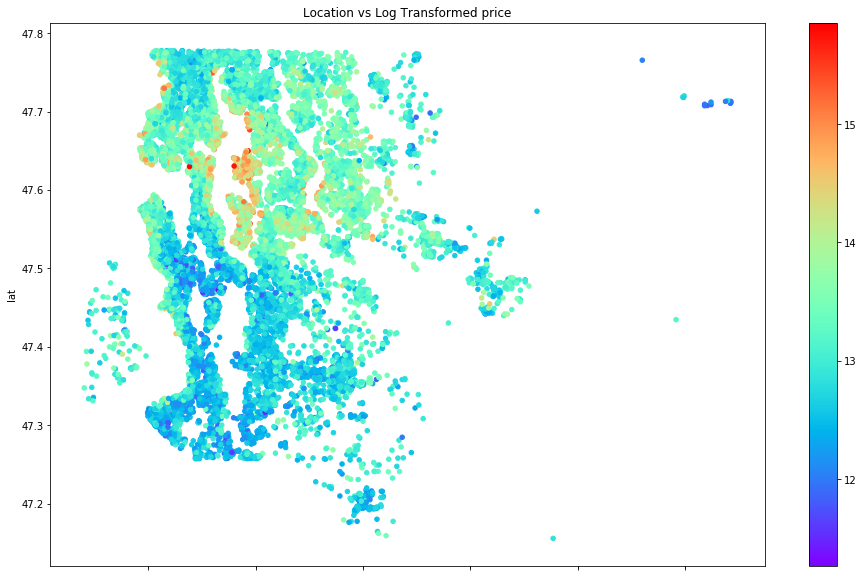

In [47]:
housing.plot(kind = 'scatter', x= 'long', y= 'lat', figsize=(16,10),
            c=housing_pred['price'], cmap = 'rainbow')
plt.title('Location vs Log Transformed price')
plt.show()

Looking at this scatter plot, location obviously affects price.

In [48]:
housing.zipcode.dtype

dtype('int64')

### Which are the most expensive zip codes in King County?

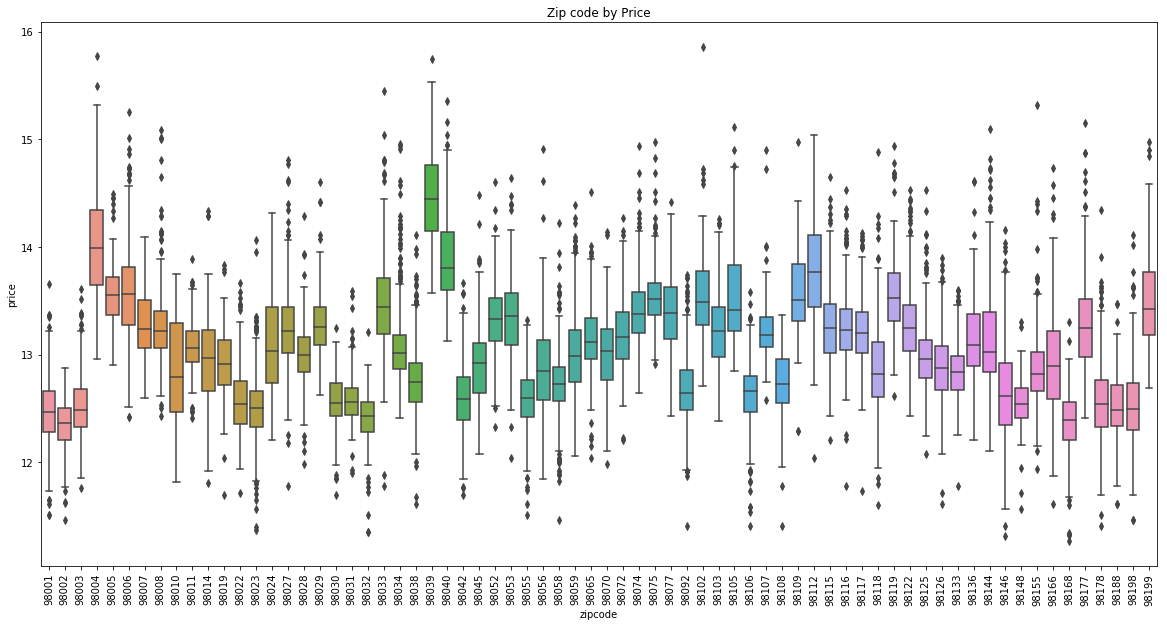

In [50]:
x = housing['zipcode']
y = housing_pred['price']
plt.figure(figsize = (20, 10))
sns.boxplot(x=x, y=y, data = housing)
plt.title('Zip code by Price')
plt.xlabel('zipcode')
plt.xticks(rotation = 90)
plt.ylabel('price')
plt.show()

It looks like the most expensive zipcodes are: 98004, 98039, 98040, 98112, and 98199. These counties are Medina, Bellevue, 
 Mercer Island, and Seattle
 Also looking at the longtitude/latitude graph above shows that you should buy homes in the northwestern part of the county.

Because there is no clear way to group the zipcode, I will use one-hot encoding to deal with them. I don't see any easy way to deal with longtitude and latitude for the model, so I will leave them out for now.

In [53]:
housing["zipcode"] = housing["zipcode"].astype('str')
zip_dummy = pd.get_dummies(housing.zipcode, prefix = 'ZC')
final_housing = pd.concat([housing_pred, zip_dummy], axis = 1)
final_housing = final_housing.drop(['yr_built'], axis ='columns')
final_housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15',
       'sqft_lot15', 'ZC_98001', 'ZC_98002', 'ZC_98003', 'ZC_98004',
       'ZC_98005', 'ZC_98006', 'ZC_98007', 'ZC_98008', 'ZC_98010', 'ZC_98011',
       'ZC_98014', 'ZC_98019', 'ZC_98022', 'ZC_98023', 'ZC_98024', 'ZC_98027',
       'ZC_98028', 'ZC_98029', 'ZC_98030', 'ZC_98031', 'ZC_98032', 'ZC_98033',
       'ZC_98034', 'ZC_98038', 'ZC_98039', 'ZC_98040', 'ZC_98042', 'ZC_98045',
       'ZC_98052', 'ZC_98053', 'ZC_98055', 'ZC_98056', 'ZC_98058', 'ZC_98059',
       'ZC_98065', 'ZC_98070', 'ZC_98072', 'ZC_98074', 'ZC_98075', 'ZC_98077',
       'ZC_98092', 'ZC_98102', 'ZC_98103', 'ZC_98105', 'ZC_98106', 'ZC_98107',
       'ZC_98108', 'ZC_98109', 'ZC_98112', 'ZC_98115', 'ZC_98116', 'ZC_98117',
       'ZC_98118', 'ZC_98119', 'ZC_98122', 'ZC_98125', 'ZC_98126', 'ZC_98133',
       'ZC_98136', 'ZC_98144', 'ZC_98146', 'ZC_98148', 'ZC_98155', 'ZC_981

In [54]:
final_housing.info() #sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19163 entries, 1 to 21577
Data columns (total 82 columns):
price            19163 non-null float64
bedrooms         19163 non-null int64
bathrooms        19163 non-null float64
sqft_living      19163 non-null float64
sqft_lot         19163 non-null float64
floors           19163 non-null float64
waterfront       19163 non-null category
view             19163 non-null float64
condition        19163 non-null int64
grade            19163 non-null int64
sqft_living15    19163 non-null int64
sqft_lot15       19163 non-null float64
ZC_98001         19163 non-null uint8
ZC_98002         19163 non-null uint8
ZC_98003         19163 non-null uint8
ZC_98004         19163 non-null uint8
ZC_98005         19163 non-null uint8
ZC_98006         19163 non-null uint8
ZC_98007         19163 non-null uint8
ZC_98008         19163 non-null uint8
ZC_98010         19163 non-null uint8
ZC_98011         19163 non-null uint8
ZC_98014         19163 non-null uint8


In [81]:
final_housing = final_housing.drop('ZC_98199', axis = 1) #dropped due to possible dummy variable trap

### Does the year the house was built affect the price?

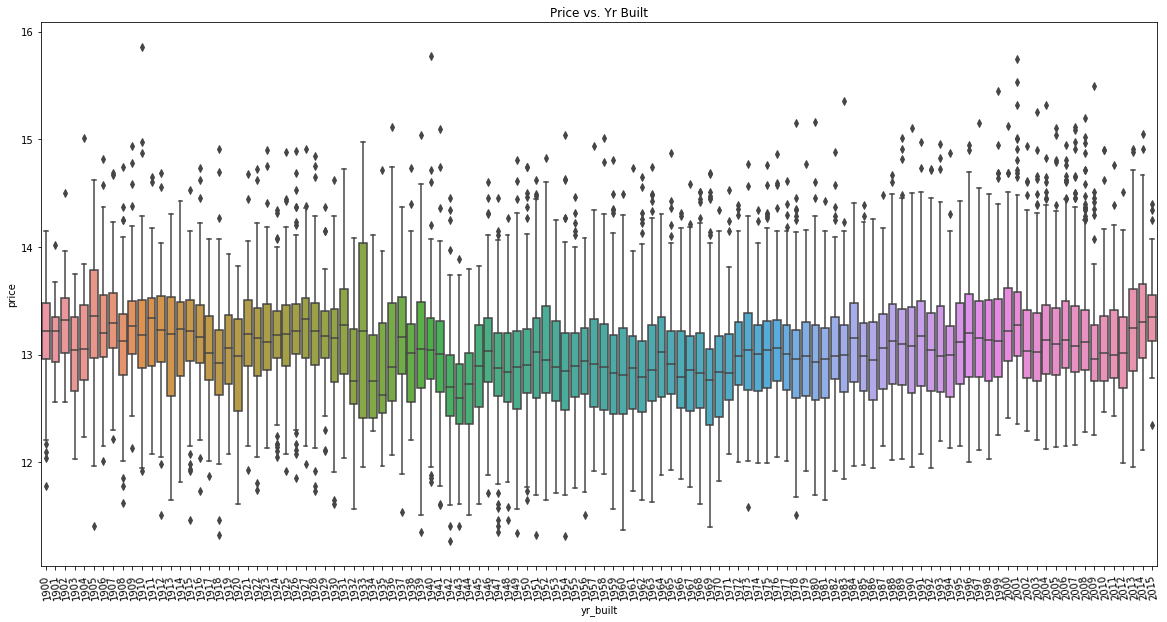

In [62]:
x = housing['yr_built']
y = housing_pred['price']
plt.figure(figsize=(20,10))
sns.boxplot(x=x, y=y, data=housing)
plt.title('Price vs. Yr Built')
plt.xlabel('yr_built')
plt.xticks(rotation = 100)
plt.ylabel('price')
plt.show()

The year the house was built doesn't seems to affect price too much

# Modeling the Data

I have decided to use Statsmodels because the summary gives a lot of information that is easy to read.

In [43]:
outcome = 'price'
predictors = housing_pred.drop(['price'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [44]:
model = ols(formula = formula, data = housing_pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3112.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:35:18   Log-Likelihood:                -4557.4
No. Observations:               19163   AIC:                             9141.
Df Residuals:                   19150   BIC:                             9243.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            20.2005      0.210     96.099      0.000      19.788      20.613
waterfront[T.1.0]     0.3994      0.028     14.201      0.000       0.344       0.455
bedrooms             -0.0391      0.003    -11.725      0.000      -0.046      -0.033
bathrooms             0.0783      0.005     15.186      0.000       0.068       0.088
sqft_living           0.3507      0.012     29.621      0.000       0.327       0.374
sqft_lot             -0.0177      0.006     -2.786      0.005      -0.030      -0.005
floors                0.0526      0.006      9.542      0.000       0.042       0.063
view                  0.0479      0.003     14.158      0.000       0.041       0.055
condition             0.0417      0.004     11.204      0.000       0.034       0.049
grade                 0.2030      0.003     61.038      0.000       0.196       0.209
yr_built             -0.0057      0.000    -56.946      0.000      -0.006      -0.006
sqft_living15         0.0001   5.42e-06     22.329      0.000       0.000       0.000
sqft_lot15           -0.0499      0.007     -7.129      0.000      -0.064      -0.036
==============================================================================
Omnibus:                       44.444   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.874
Skew:                          -0.066   Prob(JB):                     8.97e-12
Kurtosis:                       3.215   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An adjusted R-squared value of 0.661 is not bad. Most of the p-values are below 0.05, sqft_lot is at 0.05. For some reason, the coeffient for bedrooms and sqft_lot are negative. Will need to look into that more closely. The kurtosis is around 3 which is mostly consistent with a normal distribution.

### Are residuals consistent with a normal distribution?

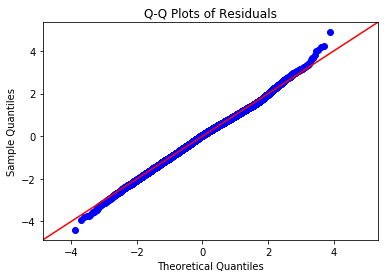

In [45]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)
plt.title('Q-Q Plots of Residuals');

While there are some tails at the ends, the residuals are mostly normal.

In [46]:
#Using cross validation to test model's performance
linreg = LinearRegression()
X = housing_pred.drop('price', axis = 1)
y = housing_pred.price

cv_results = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
cv_results

array([-0.09437201, -0.09926589, -0.0897311 , -0.09981872, -0.0899736 ,
       -0.097386  , -0.09802042, -0.09814098, -0.08667733, -0.13178244])

In [47]:
np.mean(cv_results)

-0.09851684796506997

In [48]:
#Running a recursive feature elimination to see if there are any features that can be eliminated to improve the model
predictors = housing_pred.drop(['price', 'waterfront'], axis = 1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 1)
selector = selector.fit(predictors, housing_pred['price'])
list(zip(predictors.columns, selector.ranking_))

[('bedrooms', 6),
 ('bathrooms', 8),
 ('sqft_living', 1),
 ('sqft_lot', 9),
 ('floors', 7),
 ('view', 3),
 ('condition', 4),
 ('grade', 2),
 ('yr_built', 10),
 ('sqft_living15', 11),
 ('sqft_lot15', 5)]

In [49]:
#re-running the model without sqft_living15
data_dr = housing_pred.drop('sqft_living15', axis = 1)
outcome = 'price'
predictors = data_dr.drop('price', axis = 1)
pred_sum = "+".join(predictors.columns)
formula1 = outcome + '~' + pred_sum

In [50]:
model2 = ols(formula = formula1, data = data_dr).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3265.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:35:59   Log-Likelihood:                -4803.6
No. Observations:               19163   AIC:                             9631.
Df Residuals:                   19151   BIC:                             9726.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.3637      0.210     92.425      0.000      18.953      19.774
waterfront[T.1.0]     0.3764      0.028     13.222      0.000       0.321       0.432
bedrooms             -0.0414      0.003    -12.253      0.000      -0.048      -0.035
bathrooms             0.0762      0.005     14.600      0.000       0.066       0.086
sqft_living           0.4328      0.011     37.967      0.000       0.410       0.455
sqft_lot             -0.0212      0.006     -3.306      0.001      -0.034      -0.009
floors                0.0514      0.006      9.203      0.000       0.040       0.062
view                  0.0566      0.003     16.635      0.000       0.050       0.063
condition             0.0374      0.004      9.929      0.000       0.030       0.045
grade                 0.2283      0.003     72.109      0.000       0.222       0.235
yr_built             -0.0056      0.000    -55.631      0.000      -0.006      -0.005
sqft_lot15           -0.0276      0.007     -3.938      0.000      -0.041      -0.014
==============================================================================
Omnibus:                       57.978   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.482
Skew:                          -0.048   Prob(JB):                     1.82e-16
Kurtosis:                       3.285   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
linreg = LinearRegression()
X = data_dr.drop('price', axis = 1)
y = data_dr.price

cv_results = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
cv_results

array([-0.09684241, -0.10185194, -0.09293495, -0.10212248, -0.09318839,
       -0.10050085, -0.10150472, -0.10122862, -0.08010309, -0.14293283])

In [52]:
np.mean(cv_results)

-0.10132102809064787

So, dropping sqft_living15 didn't help the model, it seemed to hurt it.

In [82]:
#checking if dropping waterfront will help the model because it's mostly zeroes
data_built = housing_pred.drop('waterfront', axis = 1)
outcome = 'price'
predictors = data_built.drop('price', axis = 1)
pred_sum = "+".join(predictors.columns)
formula1 = outcome + '~' + pred_sum

In [83]:
model3 = ols(formula = formula1, data = data_built).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     3341.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:01:49   Log-Likelihood:                -4657.7
No. Observations:               19163   AIC:                             9339.
Df Residuals:                   19151   BIC:                             9434.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.2030      0.211     95.612      0.000      19.789      20.617
bedrooms         -0.0409      0.003    -12.226      0.000      -0.048      -0.034
bathrooms         0.0792      0.005     15.283      0.000       0.069       0.089
sqft_living       0.3515      0.012     29.537      0.000       0.328       0.375
sqft_lot         -0.0188      0.006     -2.951      0.003      -0.031      -0.006
floors            0.0555      0.006     10.025      0.000       0.045       0.066
view              0.0666      0.003     21.252      0.000       0.060       0.073
condition         0.0416      0.004     11.100      0.000       0.034       0.049
grade             0.2027      0.003     60.643      0.000       0.196       0.209
yr_built         -0.0057      0.000    -56.804      0.000      -0.006      -0.006
sqft_living15     0.0001   5.44e-06     21.711      0.000       0.000       0.000
sqft_lot15       -0.0456      0.007     -6.490      0.000      -0.059      -0.032
==============================================================================
Omnibus:                       36.744   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.297
Skew:                          -0.052   Prob(JB):                     6.53e-10
Kurtosis:                       3.205   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
linreg = LinearRegression()
X = data_dr.drop('price', axis = 1)
y = data_dr.price

cv_results3 = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
cv_results3

array([-0.09684241, -0.10185194, -0.09293495, -0.10212248, -0.09318839,
       -0.10050085, -0.10150472, -0.10122862, -0.08010309, -0.14293283])

In [85]:
np.mean(cv_results3)

-0.10132102809064787

That didn't help either...

## Model with categorical variables

Does location affect the price of a house?

In [55]:
outcome = 'price'
predictors = final_housing.drop('price', axis = 1)
pred_sum_fin = "+".join(predictors.columns)
formula4 = outcome + "~" + pred_sum_fin

In [56]:
model4 = ols(formula = formula4, data = final_housing).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1770.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:56:59   Log-Likelihood:                 5490.2
No. Observations:               19163   AIC:                        -1.082e+04
Df Residuals:                   19082   BIC:                        -1.018e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.3974      0.043    196.242      0.000       8.314       8.481
waterfront[T.1.0]     0.4997      0.017     29.500      0.000       0.467       0.533
bedrooms             -0.0134      0.002     -6.682      0.000      -0.017      -0.009
bathrooms             0.0331      0.003     11.153      0.000       0.027       0.039
sqft_living           0.3790      0.007     53.663      0.000       0.365       0.393
sqft_lot              0.0817      0.004     21.451      0.000       0.074       0.089
floors                0.0127      0.003      3.804      0.000       0.006       0.019
view                  0.0565      0.002     27.086      0.000       0.052       0.061
condition             0.0505      0.002     23.011      0.000       0.046       0.055
grade                 0.0955      0.002     46.705      0.000       0.091       0.100
sqft_living15        8.1e-05   3.44e-06     23.518      0.000    7.42e-05    8.77e-05
sqft_lot15           -0.0213      0.004     -5.006      0.000      -0.030      -0.013
ZC_98001             -0.3718      0.010    -36.766      0.000      -0.392      -0.352
ZC_98002             -0.3550      0.014    -26.112      0.000      -0.382      -0.328
ZC_98003             -0.3554      0.011    -31.255      0.000      -0.378      -0.333
ZC_98004              0.7722      0.011     70.199      0.000       0.751       0.794
ZC_98005              0.3546      0.015     24.368      0.000       0.326       0.383
ZC_98006              0.2668      0.009     29.565      0.000       0.249       0.284
ZC_98007              0.2913      0.016     17.716      0.000       0.259       0.323
ZC_98008              0.2946      0.011     25.830      0.000       0.272       0.317
ZC_98010             -0.1276      0.020     -6.530      0.000      -0.166      -0.089
ZC_98011              0.0789      0.014      5.745      0.000       0.052       0.106
ZC_98014             -0.0763      0.018     -4.322      0.000      -0.111      -0.042
ZC_98019             -0.0432      0.014     -3.052      0.002      -0.071      -0.015
ZC_98022             -0.3112      0.013    -24.336      0.000      -0.336      -0.286
ZC_98023             -0.3936      0.009    -45.252      0.000      -0.411      -0.377
ZC_98024              0.0559      0.022      2.588      0.010       0.014       0.098
ZC_98027              0.1339      0.010     13.980      0.000       0.115       0.153
ZC_98028              0.0490      0.011      4.295      0.000       0.027       0.071
ZC_98029              0.2425      0.011     22.600      0.000       0.221       0.263
ZC_98030             -0.3147      0.012    -26.584      0.000      -0.338      -0.291
ZC_98031             -0.2923      0.012    -25.150      0.000      -0.315      -0.270
ZC_98032             -0.3864      0.017    -22.825      0.000      -0.420

Adding the zipcode improved the adjusted R-squared value from 0.661 to 0.881. Which explains about 20% of the variance in the price. Most of the p-values are below 0.05 except for a few of the zipcode dummy variables. The bedrooms and sqft_lot15 coeffients are  negative, which could be investigated further in the future. For now, they will stay in.

In [57]:
#Model Validation
linreg = LinearRegression()
X = final_housing.drop('price', axis = 1)
y = final_housing.price

cv_results4 = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
cv_results4

array([-3.01027244e-02, -3.50291679e-02, -2.99632296e-02, -3.65202201e-02,
       -2.99097326e-02, -3.39888548e-02, -3.22811083e-02, -3.27399816e-02,
       -2.84949532e-02, -9.28597684e+15])

In [58]:
np.mean(cv_results4)

-928597683918148.8

In [59]:
#Using r-squared
linreg = LinearRegression()
X = final_housing.drop('price', axis = 1)
y = final_housing.price

cv_results5 = cross_val_score(linreg, X, y, cv = 10)
cv_results5

array([ 8.67701001e-01,  8.66863002e-01,  8.70427115e-01,  8.41273246e-01,
        8.73370924e-01,  8.60270401e-01,  8.64319031e-01,  8.65342049e-01,
        8.68735060e-01, -2.75706997e+16])

In [60]:
#Test-train-split to test the model's performance
X = final_housing.drop('price', axis = 1)
y = final_housing.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.033184360991136204
Test Mean Squarred Error: 0.03249740445734676


The test MSE and train MSE are similar which gives me confidence that the model is not overfitting or underfitting.

# Intepret Results

## Model Summary

In total, 12 variables plus the 69 dummy variables for the zipcodes affected the prices of housing in King County. The OLS regression has an adjusted R-squared value of 0.881 which gives me fairly high confidence in the model predicting housing prices in King County. The remaining 0.119 may be due to factors such as seasonal market flucuations, sampling error or bidding wars that bumped up the price. The features that affect price the most was: grade, sqft_living, waterfront, view, condition and bathrooms.
Most of the p-values are less than 0.05 which gives me a 95% confidence that those coefficients are not zero. Another thing that give me confidence was the train-test-split MSEs were close in value (train: 0.331, test:0.323). This shows that the model neither overfitting or underfitting. 

## Intepreting Coefficents

Taking a closer look at some of the coefficients:
For sqft_living the coefficient was 0.3757 which means for a 1% increase/decrease in sqft_living, the price would increase/decrease by 0.3757% with everything else remaining unchanged. For waterfront, the coefficient was 0.4948 and this means for a property with a view of the water, the price would increase by 90% with everything else remaining unchanged.
For the bathrooms the coefficent is 0.0391 and this means that if a bathroom is added or removed the price would increase/decrease by 0.0391%.

### Future works

When I have time to reexamine this project, I think I would like to check to see if any columns I removed would improve or hurt the model. Also I would like to see why the bedrooms coeffcient was negative and what could be causing that.